[0, 111.975, 215.77, 293.72, 367.135, 430.13, 473.62, 516.43, 555.765, 584.985, 611.72, 636.775, 655.61, 677.97, 690.63, 711.71, 727.085, 743.035, 754.675, 766.195, 781.2, 793.78, 805.085, 814.645, 826.1, 834.975, 842.9, 852.085, 860.44, 868.63, 874.885, 883.58, 890.415, 896.245, 901.16, 908.135, 913.515, 919.225, 925.225, 930.92, 936.0, 939.995, 945.545, 949.81, 954.03, 959.12, 963.565, 968.095, 972.52, 976.625, 980.25, 984.28, 988.23, 991.99, 996.015, 999.655, 1003.035, 1006.435, 1009.73, 1013.115, 1016.8, 1020.75, 1024.69, 1028.135, 1030.94, 1033.6, 1036.705, 1039.88, 1042.93, 1046.555, 1049.98, 1052.985, 1055.825, 1058.705, 1062.065, 1064.865, 1067.915, 1070.78, 1073.985, 1077.7, 1080.53, 1083.205, 1085.995, 1088.755, 1091.51, 1094.595, 1098.07, 1100.69, 1103.115, 1106.2, 1109.08, 1111.395, 1113.67, 1116.53, 1118.945, 1121.58, 1124.095, 1126.585, 1128.745, 1130.985, 1133.46, 1135.97, 1138.735, 1140.99, 1143.725, 1146.495, 1148.795, 1151.205, 1153.785, 1156.25, 1158.495, 1160.73, 11

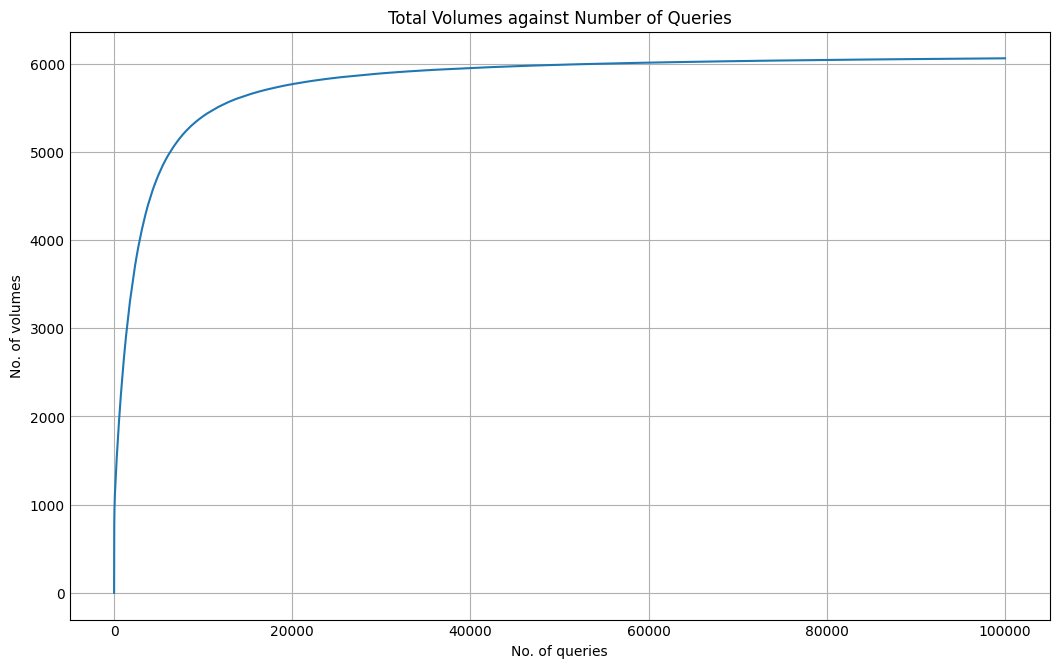

In [1]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 2048

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)


def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(2, int(math.log(RSEmax, 2))+1):
            if end_int == start_int + 1:
                c = end_int
                break
            if start_int % 2 == 0:
                if end_int - start_int < 4:
                    c = start_int + 1
                    break
                else:
                    c = start_int
                    break
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i-1) != 1:
                c = start_int + (2**(i-1) -1)
                break   
      
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return query_list

max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 100000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = set()
        vol_sum = 0
        query_tracker = set()
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) >= max_volumes:
                when_max_reach = j
                for v in range(when_max_reach, no_of_queries):
                    arr[v+1] = max_volumes + arr[v+1]
                break
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                for i in range(int((RSEmax*(RSEmax + 1))/2), no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.add(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.add(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()